### 4. Feladatsor

Sajátértékek, sajátvektorok közelítése

#### Gersgorin-körök

**Tétel:** Egy $A = (a_{ij})_{i,j = 1\ldots n}$ mátrix 
$$
G_i = \left\{ z \in \mathbb{C}: |z - a_{ii}| \leq \sum_{j, i\neq j} |a_{ij}| \right\} \quad (i=1\ldots n)
$$

képlettel definiált Gersgorin-köreinek uniója tartalmazza a mátrix sajátértékeit.

#### 1. feladat

Írjunk függvényt, ami ábrázolja a bemeneti mátrix Gersgorin-köreit és a sajátértékeit.

In [17]:
function h = gersgorin(A)
    hold on
    th = 0:pi/50:2*pi;
    for i=1:rank(A)
        r = 0;
        for j=1:rank(A)
            r = r + A(i,j);
        end
        r = r - A(i,i);
        xunit = r * cos(th) + A(i,i);
        yunit = r * sin(th);
        h = plot(xunit, yunit);
    end
end

In [13]:
A = magic(2)

A =

   4   3
   1   2



ans = -151.35


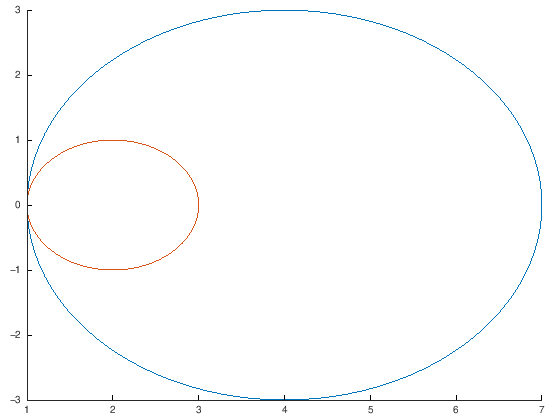

In [18]:
gersgorin(A)

#### Hatványmódszer

Legyen $A$ (az egyszerűség kedvéért) diagonalizálható mátrix, azaz tfh. a $\{v_j\}$ sajátvektorok bázist alkotnak, továbbá $\lambda_1$ a domináns sajátérték (azaz $|\lambda_1| > |\lambda_j|$). 

Ha $x_0 = \sum c_j v_j$ olyan vektor, amire $c_1 \neq 0$, ekkor 
az 
$$
x_n = A^n x_0 = \sum c_j A^n v_j = \sum c_j \lambda_j^n v_j = c_1 \lambda_1^n \left(v_1 + \sum_{j > 1} \frac{c_j\lambda_j^n}{c_1\lambda_1^n} v_j \right)
$$

sorozat $y_n$ normáltjára teljesül, hogy

$$
y_n = \frac{x_n}{\|x_n\|} \to \iota \frac{v_1}{\|v_1\|},
$$

ahol természetesen $|\iota| = 1$.


#### 2. feladat

Implementáljuk a hatványmódszert.

#### PageRank-ish

Tekintsünk a világháló egy kis részét. Tegyük fel, hogy minden oldalról vezet legalább egy másik oldalra link.


 1. Legyen $\tilde P$ olyan mátrix, amire $\tilde P_{ij} = 1$ pontosan akkor, ha a $j.$ oldalról link vezet az $i.$-re, egyébként $\tilde P_{ij} = 0$.

 2. $\tilde P$ oszlopainak egy-összegűvé normálásával hozzuk létre a $P$ mátrixot. Erre tekinthetünk úgy, hogy az $ij$ koordináta megadja annak a valószínűségét, hogy a böngésző a $j.$ oldalról az $i.$-re jut egy kattintással.
 
 3. Gondoljuk meg, hogy ha az $x$ vektor tartalmazza az oldalakon tartózkodás valószínűségeit, akkor a $Px$ vektor az egy kattintással későbbi valószínűségeket fogja leírjni. 
 
 Például ha egy valószínűséggel az első oldalon tartózkodunk, akkor az egy kattintással későbbi valószínűségeket pont a $P$ mátrix első oszlopa fogja megadni: 
 
 $$x = [1, 0, \ldots, 0]^T, Px = P_{:, 1}.$$
 
 4. Mivel $P^T \mathbf{1} = \mathbf{1}$, így $1$ sajátértéke $P^T$-nek, azaz $P$-nek is. A Gersgorin-körök használatával gondoljuk meg, hogy ennél hosszabb sajátérték nem lehet.
 
 5. Ha feltesszük, hogy kattintások sorozatával bármelyik oldalról eljuthatunk bármelyik másik oldalra, akkor a $P$ mátrix irreducibilis, és a Perron-Frobenius tétel miatt az egyhez tartozó sajátaltér egydimenziós, azaz a $P \pi = \pi $ egyenlet megoldása (konstans szorzó erejéig) egyértelmű. Egy-összegűvé normálva, a $\pi$ vektort nevezzük stacionárius eloszlásnak, ez a hosszútávú viselkedés egy modellje.
 
 6. Gondoljuk meg, hogy $P^n x$ határértékben intuitíve a végtelen sok kattintást követő eloszlást adja meg, majd az eddigek segítségével formalizáljuk ezt az állítást.
 
A valóságban persze nem garantált, hogy minden oldalról el lehet jutni minden másik oldalra, így szokás feltételezni, hogy a böngésző egy alacsony $1-\alpha$ valószínűséggel bármely oldalról egy kattintással eljuthat bármely másikra - ez egyébként a könyvjelzők használatának is lehet egy modellje. Ebben az esetben a $P$ mátrix helyett egy
$$
 (1-\alpha)\frac{1}{n}E + \alpha P 
$$
alakút szokás tekinteni, ahol $E$ egy $n\times n$-es csupa $1$ mátrix.

A $\pi$ valószínűségek közelítő értéke alapján az oldalak rangsorolhatók: például egy keresésnek megfelelő oldalakat lehet ebben a sorrendben visszaadni a felhasználónak.

#### 3*. feladat

Implementáljuk az ismertetett algoritmust, és próbáljuk is ki valós vagy kitalált adatokon.